<a href="https://colab.research.google.com/github/DawoodBhai420/Small-Image-Classification-Using-CNN/blob/main/cifar_10_image_classification_with_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [3]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
def plot_image(X, y, index):
  plt.imshow(X[index])
  print(y[index])
  print(classes[y[index]])

7
horse


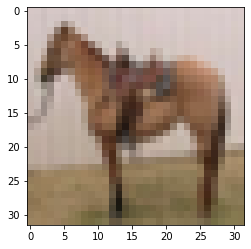

In [12]:
plot_image(X_train, y_train, 289)

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=.2,
                                   height_shift_range=.2,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_generator = train_datagen.flow(X_train, y_train)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow(X_test, y_test)

In [14]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(32,32,3)),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(32, (3,3), activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(64, (3,3), activation='relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(512, activation='relu'),
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
his = model.fit(train_generator,
                epochs=20,
                validation_data=validation_generator,
                verbose=1)

Epoch 1/20
1563/1563 [==============================] - 59s 31ms/step - loss: 1.8534 - accuracy: 0.3168 - val_loss: 1.4455 - val_accuracy: 0.4741
Epoch 2/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.6206 - accuracy: 0.4105 - val_loss: 1.4986 - val_accuracy: 0.4797
Epoch 3/20
1563/1563 [==============================] - 48s 30ms/step - loss: 1.5249 - accuracy: 0.4506 - val_loss: 1.2740 - val_accuracy: 0.5503
Epoch 4/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4645 - accuracy: 0.4761 - val_loss: 1.2973 - val_accuracy: 0.5493
Epoch 5/20
1563/1563 [==============================] - 48s 30ms/step - loss: 1.4380 - accuracy: 0.4891 - val_loss: 1.4630 - val_accuracy: 0.5114
Epoch 6/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4214 - accuracy: 0.4987 - val_loss: 1.2638 - val_accuracy: 0.5532
Epoch 7/20
1563/1563 [==============================] - 48s 31ms/step - loss: 1.4207 - accuracy: 0.5015 - val_loss: 1.2027 -

<function matplotlib.pyplot.show>

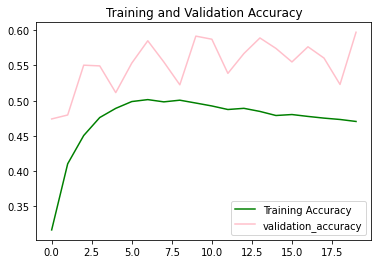

<Figure size 432x288 with 0 Axes>

In [16]:
acc = his.history['accuracy']
loss = his.history['loss']
val_acc = his.history['val_accuracy']
val_loss = his.history['val_loss']

epoch = range(len(acc))
plt.plot(epoch, acc, 'green', label='Training Accuracy')
plt.plot(epoch, val_acc, 'pink', label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show

In [20]:
def test(X, y, index):
  X[index] = X[index].reshape(-1,32,32,3)
  plt.imshow(X[index])
  print('Orignal label: ', classes[y[index]])
  pred = model.predict(X[index])
  print('Predicted label: ', classes[pred])

Orignal label:  cat


ValueError: ignored

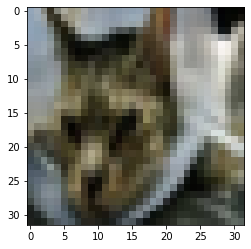

In [21]:
test(X_test, y_test, 5689)